In [1]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

import xarray as xr
import geopy
import geopy.distance
from geopy.geocoders import Nominatim

import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

from tqdm import tqdm
from fancyimpute import KNN, NuclearNormMinimization, SoftImpute, BiScaler

In [2]:
df = pd.read_csv('/home/jaydeeppawar/RCS/DATASET/ALL INDIA/Tomato/Imputed_Price_Arrivals_Lat_Long.csv')

df = df.drop(['Unnamed: 0'], axis = 1)

In [10]:
lat_long_state_dist_mark = set()

for index, row in df.iterrows():
    lat_long_state_dist_mark.add((row['State']+' | '+row['District']+' | '+row['Market'], row['Latitude_actual'], row['Longitude_actual']))

lat_long_state_dist_mark = list(lat_long_state_dist_mark)
lat_long_state_dist_mark.sort()


loc_dict = {}

for (mandi, lat, long) in lat_long_state_dist_mark:
    loc_dict[mandi] = {}
    loc_dict[mandi]['Latitude'] = lat
    loc_dict[mandi]['Longitude']= long


def distance(m1, m2, loc_dict):
    # 1 lat degree = 110.574
    # 1 long degree = 111.320*cos(latitude)
    c1 = (loc_dict[m1]['Latitude'],loc_dict[m1]['Longitude'])
    c2 = (loc_dict[m2]['Latitude'],loc_dict[m2]['Longitude'])
    return geopy.distance.geodesic(c1,c2).km


def nbr_dataframe_creator(loc_dict):
    nbr_list = []
    for i, m1 in enumerate(lat_long_state_dist_mark):
        for j, m2 in enumerate(lat_long_state_dist_mark):
            dist = distance(m1[0], m2[0], loc_dict)
            if dist <=300:
                nbr_list.append([i, j, dist])
    nbr = pd.DataFrame(nbr_list, columns=['Source', 'Destination', 'Distance'])
    return nbr

nbr = nbr_dataframe_creator(loc_dict)
print(nbr.shape)

(56475, 3)


In [13]:
dist_mark_set = set()
for index in df.index:
    element = df['State'][index]+'|'+df['District'][index]+'|'+df['Market'][index]
    dist_mark_set.add(element)

dist_mark_list = list(dist_mark_set)
dist_mark_list.sort()

ans_lis = []


for count, first_pair in enumerate(dist_mark_list):
    print(count,"/",len(dist_mark_list))
    for second_pair in dist_mark_list[count+1:]:
        state1, dist1, mark1 = first_pair.split('|')
        lis1 = []

        for index in df.index:
            if df['State'][index]==state1 and df['District'][index]==dist1 and df['Market'][index]==mark1:
                lis1.append(df['Imp_Price'][index])

        state2, dist2, mark2 = second_pair.split('|')
        lis2 = []

        for index in df.index:
            if df['State'][index]==state2 and df['District'][index]==dist2 and df['Market'][index]==mark2:
                lis2.append(df['Imp_Price'][index])
        
        tp = np.corrcoef(np.array(lis1),np.array(lis2))[0,1]
        ans_lis.append([tp, first_pair, second_pair])

0 / 557


KeyboardInterrupt: 

In [ ]:
i = 0

for element in dist_mark_list:
    print(i, '      ', element)
    i = i+1

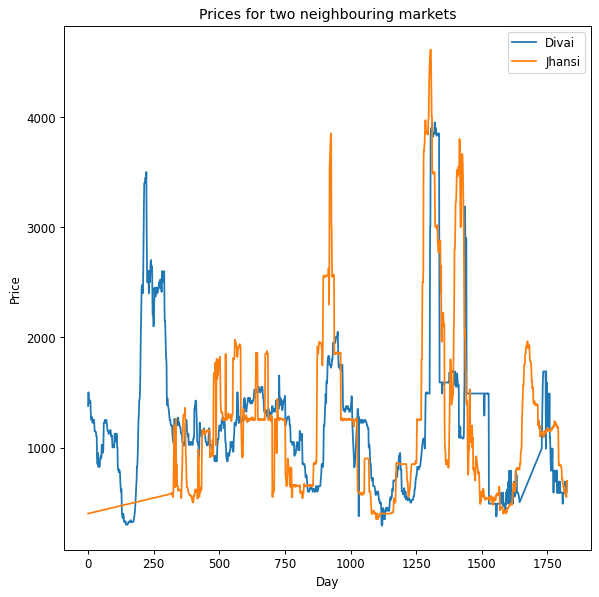

0.38816029630349663


In [6]:
# dist1, mark1 = x.split('|')
lis1 = []

for index in df.index:
    if df['Market'][index]=='Divai':
        lis1.append(df['Imp_Price'][index])

# dist2, mark2 = y.split('|')
lis2 = []

for index in df.index:
    if df['Market'][index]=='Jhansi':
        lis2.append(df['Imp_Price'][index])

days = []
for i in range(len(lis1)):
    days.append(i)

figure(figsize=(8,8), dpi=85)
plt.plot(days, lis1, label='Divai')
plt.plot(days, lis2, label='Jhansi')


plt.xlabel('Day')
plt.ylabel('Price')
plt.title('Prices for two neighbouring markets')
  
plt.legend()
plt.show()

print(np.corrcoef(np.array(lis1),np.array(lis2))[0,1])

In [5]:
lat_long_dist_mark = [
('Ambedkarnagar Akbarpur', 26.4398744, 80.01799967566015),
('Badaun Badayoun', 28.0311, 79.1271),
('Baghpat Baraut', 29.154147700000003, 77.30595350833059),
('Bahraich Bahraich', 27.7336958, 81.47732127661058),
('Banda Banda', 25.4763, 80.3395),
('Barabanki Barabanki', 26.93823105, 81.38609761204991),
('Bareilly Bareilly', 28.416667, 79.383333),
('Bulandshahar Buland Shahr', 28.407, 77.8498),
('Bulandshahar Divai', 28.2091, 78.2562),
('Bulandshahar Gulavati', 28.5902, 77.7936),
('Bulandshahar Khurja', 28.2059068, 77.87571443846723),
('Etawah Jasvantnagar', 26.8819, 78.906),
('Faizabad Faizabad', 26.63807555, 82.05902434378625),
('Firozabad Firozabad', 27.17736635, 78.38991197951182),
('Ghaziabad Ghaziabad', 28.7218316, 77.45268496448504),
('Ghaziabad Hapur', 28.740612499999997, 77.83542556519009),
('Gorakhpur Gorakhpur', 26.6711433, 83.36457243864551),
('Jhansi Jhansi', 25.530130800000002, 78.65242146225927),
('Kanpur Kanpur(Grain)', 26.4499, 80.3319),
('Lakhimpur Lakhimpur', 27.985060150000002, 80.75384538357649),
('Lalitpur Lalitpur', 24.70038485, 78.51866758648347),
('Lucknow Lucknow', 26.8381, 80.9346001),
('Muradabad Muradabad', 28.8386, 78.7733),
('Muzaffarnagar Khatauli', 29.29320165, 77.74500681677128),
('Muzaffarnagar Muzzafarnagar', 29.3751643, 77.8074388),
('Raebarelli Raibareilly', 26.2145, 81.2528),
('Saharanpur Saharanpur', 29.9880774, 77.5081299470512),
('Shahjahanpur Shahjahanpur', 27.912633149999998, 79.74656294869826),
('Sitapur Sitapur', 27.5046392, 80.82946583420815),
('Sultanpur Sultanpur', 26.242510850000002, 82.29616931685918),
('Unnao Unnao', 26.57550365, 80.61376177782856)]


lat_long_dist_mark = set()

for index, row in df.iterrows():
    lat_long_dist_mark.add((row['District']+' '+row['Market'], row['Latitude_actual'], row['Longitude_actual']))

lat_long_dist_mark = list(lat_long_dist_mark)
lat_long_dist_mark.sort()


loc_dict = {}

for (mandi, lat, long) in lat_long_dist_mark:
    loc_dict[mandi] = {}
    loc_dict[mandi]['Latitude'] = lat
    loc_dict[mandi]['Longitude']= long


def distance(m1, m2, loc_dict):
    # 1 lat degree = 110.574
    # 1 long degree = 111.320*cos(latitude)
    c1 = (loc_dict[m1]['Latitude'],loc_dict[m1]['Longitude'])
    c2 = (loc_dict[m2]['Latitude'],loc_dict[m2]['Longitude'])
    return geopy.distance.geodesic(c1,c2).km


def plot(threshold, names, loc_dict):
    fig, ax = plt.subplots()
    for mandi in loc_dict.keys():
        x=loc_dict[mandi]['Latitude']
        y=loc_dict[mandi]['Longitude']
        plt.scatter(x,y, marker='x', color='red')
        if names:
            plt.text(x+.03, y+.03, mandi.split(' ')[1], fontsize=9)

    for i, m1 in enumerate(lat_long_dist_mark):
        for j, m2 in enumerate(lat_long_dist_mark):
            if distance(m1[0], m2[0], loc_dict)<=threshold:
                plt.plot([loc_dict[m1[0]]['Latitude'],loc_dict[m2[0]]['Latitude']],
                        [loc_dict[m1[0]]['Longitude'],loc_dict[m2[0]]['Longitude']])

    plt.title("Graph for threshold distance "+str(threshold)+" KM")
    plt.xlabel('Latitude degree')
    plt.ylabel('Longitude degree')
    plt.show()

plot(200, True, loc_dict)